# Cifar10 
## load- fit(train)- predict


##### Step1: load 

In [1]:
import os, pickle, numpy as np

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
    return X, Y

def load_cifar10(path):
    xs = []
    ys = []
    
    for i in range(1, 6):
        batch_filename = os.path.join(path, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(batch_filename)
        xs.append(X)
        ys.append(Y)
    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    Xte, Yte = load_cifar10_batch(os.path.join(path, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [2]:
X_train, y_train, X_test, y_test = load_cifar10('/Users/mahrokh/Desktop/cifar-10-batches-py')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


In [3]:
print(X_train.shape[0])
print(X_test.shape[0])

50000
10000


In [6]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train = X_train.reshape((n_train, -1))
print(X_train.shape)
X_test = X_test.reshape(n_test, -1)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


### Pre-process Data

In [7]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train -= mu
X_train /= sigma
X_test -= mu
X_test /= sigma

# print(np.mean(X_train, axis=0))
# print(np.std(X_train, axis=1))

##### Step2: import ad create estimator

In [8]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(verbose=True, early_stopping=True )

#### Step3: train (fit)

In [9]:
clf.fit(X_train, y_train)

Iteration 1, loss = 1.85592308
Validation score: 0.438200
Iteration 2, loss = 1.55241700
Validation score: 0.456800
Iteration 3, loss = 1.42554490
Validation score: 0.480800
Iteration 4, loss = 1.33360334
Validation score: 0.479000
Iteration 5, loss = 1.28303853
Validation score: 0.490600
Iteration 6, loss = 1.24068103
Validation score: 0.498600
Iteration 7, loss = 1.19983679
Validation score: 0.498000
Iteration 8, loss = 1.17130258
Validation score: 0.511000
Iteration 9, loss = 1.14575303
Validation score: 0.504200
Iteration 10, loss = 1.11566131
Validation score: 0.496400
Iteration 11, loss = 1.09067208
Validation score: 0.503400
Iteration 12, loss = 1.07202217
Validation score: 0.511600
Iteration 13, loss = 1.03898016
Validation score: 0.498000
Iteration 14, loss = 1.02720540
Validation score: 0.499800
Iteration 15, loss = 1.01042151
Validation score: 0.503800
Iteration 16, loss = 0.98970345
Validation score: 0.497400
Iteration 17, loss = 0.96658508
Validation score: 0.494200
Iterat

MLPClassifier(early_stopping=True, verbose=True)

#### Step4: predict

In [12]:
y_pred = clf.predict(X_test)

#### Step5: accuracy

In [13]:
Accuracy = np.mean(y_pred == y_test)
print(Accuracy)

y_pred2 = clf.predict(x_train)
Accuracy2 = np.mean(y_pred2 == y_train)
print(Accuracy2)

0.5114


NameError: name 'x_train' is not defined

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("Accuracy on Train data = %.2f" % train_accuracy)
print("Accuracy on Test data = %.2f" % test_accuracy)

Accuracy on Train data = 0.65
Accuracy on Test data = 0.51


# confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
print(y_pred.shape)

[[517  47  69  33  41  21  15  36  74  32]
 [ 38 588  22  25  13  11  19  15  59 178]
 [ 56  18 394  81 118  78  61  51  20  13]
 [ 23  19  90 314  54 191  91  54  24  27]
 [ 42  21 129  81 463  90  94 102  27  22]
 [ 21   9  84 188  58 414  50  72  17  13]
 [ 31  30  90 114 102  61 597  29  12  30]
 [ 26  13  65  69 104  73  19 570   9  39]
 [185 103  33  37  30  26  19  16 690  79]
 [ 61 152  24  58  17  35  35  55  68 567]]
(10000,)


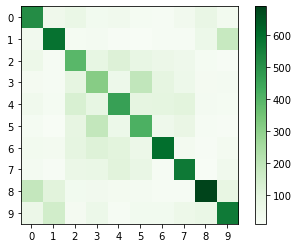

In [17]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10));

# results:

### Correct Predictions

In [18]:
X_test = sigma * X_test + mu

In [19]:
correct_idx = np.arange(10000)[y_test == y_pred]
print(correct_idx[:10])

[ 0  5  6  7  9 11 14 15 16 18]


In [20]:
correct_samples_idx = np.random.choice(correct_idx, 10, replace=False)

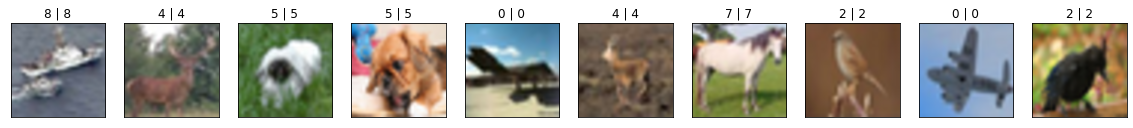

In [21]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(correct_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])

### inCorrect Predictions

In [22]:
incorrect_idx = np.arange(10000)[y_test != y_pred]
print(incorrect_idx[:10])

[ 1  2  3  4  8 10 12 13 17 19]


In [24]:
incorrect_samples_idx = np.random.choice(incorrect_idx, 10, replace=False)

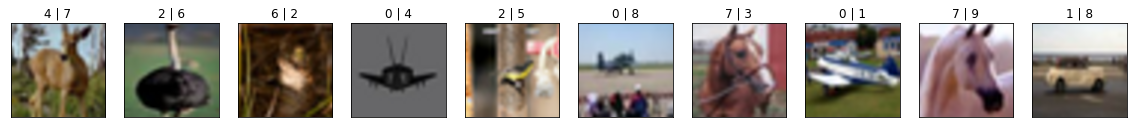

In [25]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(incorrect_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])